In [1]:
import matplotlib.pyplot as plt
import numpy as np
import discopy.util as util
import discopy.plot as plot
import discopy.geom as geom
from pathlib import Path
plt.style.use('ggplot')
import pandas as pd

In [2]:
report_path = '/gpfs/hsu/BH_disco_runs/0721cb_ecc0p4_1000_orbits/report.dat'
checkpoint_root = Path('/gpfs/hsu/BH_disco_runs/0721cb_ecc0p4_1000_orbits')
plot_dir = '/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_plots/0721cb_ecc0p4_1000_orbits'
report = np.loadtxt(report_path)

In [3]:
# After changing snapshots
t = report[:,0]
mass = report[:,1]
energy = report[:,2]
radial_momentum = report[:,3]
angular_momentum = report[:,4]
vertical_momentum = report[:,5]
passive_scalar = report[:,6]
M1 = report[:,7]
M2 = report[:,8]
r1 = report[:,9]
r2 = report[:,10]
phi1 = report[:,11]
phi2 = report[:,12]
vr1 = report[:,13]
vr2 = report[:,14]
vphi1 = report[:,15]
vphi2 = report[:,16]
dM1 = report[:,17]
dM2 = report[:,18]
dJz_grv1 = report[:,19]
dJz_grv2 = report[:,20]
dJz_snk1 = report[:,21]
dJz_snk2 = report[:,22]
dPx_grv1 = report[:,23]
dPx_grv2 = report[:,24]
dPy_grv1 = report[:,25]
dPy_grv2 = report[:,26]
dPx_snk1 = report[:,27]
dPx_snk2 = report[:,28]
dPy_snk1 = report[:,29]
dPy_snk2 = report[:,30]
dK_grv1 = report[:,31]
dK_grv2 = report[:,32]
dK_snk1 = report[:,33]
dK_snk2 = report[:,34]
dMx_snk1 = report[:,35]
dMx_snk2 = report[:,36]
dMy_snk1 = report[:,37]
dMy_snk2 = report[:,38]
dSz_snk1 = report[:,39]
dSz_snk2 = report[:,40]
dU_grv1 = report[:,41]
dU_grv2 = report[:,42]
dU_snk1 = report[:,43]
dU_snk2 = report[:,44]
dLz_snk1 = report[:,45]
dLz_snk2 = report[:,46]
dUgas_snk1 = report[:,47]
dUgas_snk2 = report[:,48]


In [18]:
# Before changing snapshots
# t = report[:,0]
# mass = report[:,1]
# energy = report[:,2]
# radial_momentum = report[:,3]
# angular_momentum = report[:,4]
# vertical_momentum = report[:,5]
# passive_scalar = report[:,6]
# M1 = report[:,7]
# M2 = report[:,8]
# r1 = report[:,9]
# r2 = report[:,10]
# phi1 = report[:,11]
# phi2 = report[:,12]
# dM1 = report[:,13]
# dM2 = report[:,14]
# dJz_grv1 = report[:,15]
# dJz_grv2 = report[:,16]
# dJz_snk1 = report[:,17]
# dJz_snk2 = report[:,18]
# dPx_grv1 = report[:,19]
# dPx_grv2 = report[:,20]
# dPy_grv1 = report[:,21]
# dPy_grv2 = report[:,22]
# dPx_snk1 = report[:,23]
# dPx_snk2 = report[:,24]
# dPy_snk1 = report[:,25]
# dPy_snk2 = report[:,26]
# dK_grv1 = report[:,27]
# dK_grv2 = report[:,28]
# dK_snk1 = report[:,29]
# dK_snk2 = report[:,30]
# dMx_snk1 = report[:,31]
# dMx_snk2 = report[:,32]
# dMy_snk1 = report[:,33]
# dMy_snk2 = report[:,34]
# dSz_snk1 = report[:,35]
# dSz_snk2 = report[:,36]
# dU_grv1 = report[:,37]
# dU_grv2 = report[:,38]
# dU_snk1 = report[:,39]
# dU_snk2 = report[:,40]

In [6]:
G = 1
dE1 = dU_grv1 + dK_grv1 + dU_snk1 + dK_snk1
dE2 = dU_grv2 + dK_grv2 + dU_snk2 + dK_snk2
dE = dE1 + dE2
Edot = dE / (t[1] - t[0])

dJ1 = dJz_grv1 + dJz_snk1
dJ2 = dJz_grv2 + dJz_snk2
dJ = dJ1 + dJ2
Jdot = dJ / (t[1] - t[0])

M1dot = dM1 / (t[1] - t[0])
M2dot = dM2 / (t[1] - t[0])

phi1dot = (phi1[1] - phi1[0]) / (t[1] - t[0])
phi2dot = (phi2[1] - phi2[0]) / (t[1] - t[0])
J1 = M1 * r1**2 * phi1dot
J2 = M2 * r2**2 * phi2dot
J = J1 + J2
v1_sqared = r1**2 * phi1dot**2
v2_sqared = r2**2 * phi2dot**2
#Use r and phi to compute x and y and then separation
E1 = 0.5 * M1 * v1_sqared - G * M1 * M2 / r1
E2 = 0.5 * M2 * v2_sqared - G * M1 * M2 / r2
E = E1 + E2

# Compute a dot
adot = -G/2 * ((M1dot * M2 + M1 * M2dot) / E - M1 * M2 * Edot / E**2)
edot = 1/G**2 * (1 + 2 * E * J**2 / (M1 * M2 * (M1 + M2)* G**2))**(-1/2) * ((Edot * J**2 + 2 * J * E * Jdot)
    * (M1**2 * M2 + M1 * M2**2) + (E * J**2) * (2 * M1 * M2 * (M1dot + M2dot)  + (M1dot * M2**2 + M1**2 * M2dot)))

In [7]:
# check_test = '/gpfs/hsu/BH_disco_runs/cb_ecc0p2_100_orbits/checkpoint_0000.h5'
# opts = util.loadOpts(check_test)
# pars = util.loadPars(check_test)
# t, r, phi, z, prim, dat = util.loadCheckpoint(check_test)
# rho = prim[:,0]
# vr = prim[:,2]
# om = prim[:,3]
# R = np.unique(r)

# rho_avg = geom.integrate2(rho, dat, opts, pars) / (2 * np.pi)
# rho_vr_avg = geom.integrate2(rho * vr, dat, opts, pars) / (2 * np.pi)
# Mdot_r= geom.integrate2(r * rho * vr, dat, opts, pars)
# vr_avg = rho_vr_avg / rho_avg

# vx = vr * np.cos(phi) - r * om * np.sin(phi)
# vy = vr * np.sin(phi) + r * om * np.cos(phi)
# v_squ = vx**2 + vy**2
# ex = v_squ * r * np.cos(phi) - r * np.cos(phi) / r - r * np.cos(phi) * vx**2 
# ey = v_squ * r * np.sin(phi) - r * np.sin(phi) / r - r * np.sin(phi) * vy**2
# rho_ex_avg = geom.integrate2(rho * ex, dat, opts, pars) / (2 * np.pi)
# rho_ey_avg = geom.integrate2(rho * ey, dat, opts, pars) / (2 * np.pi)
# ex_avg = rho_ex_avg / rho_avg
# ey_avg = rho_ey_avg / rho_avg
# e_avg = np.sqrt(ex_avg**2 + ey_avg**2)
# phi_p_avg = np.arctan2(ey_avg, ex_avg)

In [8]:
# fig, ax = plt.subplots(1, 3, figsize=(30,10))

# ax[0].plot(R, rho_avg)
# ax[0].set_ylabel('rho_avg', fontsize=20)
# ax[0].set_ylim(-100, 100)
# ax[0].tick_params(axis='both', labelsize=20)
# ax[1].plot(R, vr_avg)
# ax[1].set_ylabel('vr_avg', fontsize=20)
# ax[1].set_ylim(-1,1)
# ax[1].tick_params(axis='both', labelsize=20)
# ax[2].plot(R, Mdot_r)
# ax[2].set_ylabel('Mdot_r_avg', fontsize=20)
# ax[2].set_ylim(-50,50)
# ax[2].tick_params(axis='both', labelsize=20)

# ax[0].set_xlabel('R', fontsize=20)
# ax[1].set_xlabel('R', fontsize=20)
# ax[2].set_xlabel('R', fontsize=20)   
# fig.savefig(plot_dir + 'timed_avg_1')
# plt.close(fig) #delete figure from memory

# fig, ax = plt.subplots(2, 2, figsize=(20,20))

# ax[0,0].plot(R, ex_avg)
# ax[0,0].set_ylabel('ex_avg', fontsize=20)
# ax[0,0].set_ylim(-10,10)
# ax[0,0].tick_params(axis='both', labelsize=20)
# ax[0,1].plot(R, ey_avg)
# ax[0,1].set_ylabel('ey_avg', fontsize=20)
# ax[0,1].set_ylim(-10,10)
# ax[0,1].tick_params(axis='both', labelsize=20)
# ax[1,0].plot(R, e_avg)
# ax[1,0].set_ylabel('e_avg_avg', fontsize=20)
# ax[1,0].set_ylim(0,0.3)
# ax[1,0].tick_params(axis='both', labelsize=20)
# ax[1,1].plot(R, phi_p_avg)
# ax[1,1].set_ylabel('phi_p_avg', fontsize=20)
# ax[1,1].set_ylim(-np.pi, np.pi)
# ax[1,1].tick_params(axis='both', labelsize=20)

# ax[0,0].set_xlabel('R', fontsize=20)
# ax[0,1].set_xlabel('R', fontsize=20)
# ax[1,0].set_xlabel('R', fontsize=20)
# ax[1,1].set_xlabel('R', fontsize=20) 
# fig.savefig(plot_dir + 'timed_avg_2')
# plt.close(fig) #delete figure from memory

In [19]:
def make_plots_rho(checkpoint, fig_name1, fig_name2):
    opts = util.loadOpts(checkpoint)
    pars = util.loadPars(checkpoint)
    t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
    rho = prim[:,0]
    vr = prim[:,2]
    om = prim[:,3]
    R = np.unique(r)
    
    rho_avg = geom.integrate2(rho, dat, opts, pars) / (2 * np.pi)
    rho_vr_avg = geom.integrate2(rho * vr, dat, opts, pars) / (2 * np.pi)
    Mdot_r= geom.integrate2(r * rho * vr, dat, opts, pars)
    vr_avg = rho_vr_avg / rho_avg

    vx = vr * np.cos(phi) - r * om * np.sin(phi)
    vy = vr * np.sin(phi) + r * om * np.cos(phi)
    v_squ = vx**2 + vy**2
    ex = v_squ * r * np.cos(phi) - r * np.cos(phi) / r - r * np.cos(phi) * vx**2 
    ey = v_squ * r * np.sin(phi) - r * np.sin(phi) / r - r * np.sin(phi) * vy**2
    rho_ex_avg = geom.integrate2(rho * ex, dat, opts, pars) / (2 * np.pi)
    rho_ey_avg = geom.integrate2(rho * ey, dat, opts, pars) / (2 * np.pi)
    ex_avg = rho_ex_avg / rho_avg
    ey_avg = rho_ey_avg / rho_avg
    e_avg = np.sqrt(ex_avg**2 + ey_avg**2)
    phi_p_avg = np.arctan2(ey_avg, ex_avg)

    # Eccentricty vector
    # Put it on different plots
    fig, ax = plt.subplots(1, 3, figsize=(30,10))

    ax[0].plot(R, rho_avg)
    ax[0].set_ylabel('rho_avg', fontsize=20)
    ax[0].set_ylim(-100, 100)
    ax[0].tick_params(axis='both', labelsize=20)
    ax[1].plot(R, vr_avg)
    ax[1].set_ylabel('vr_avg', fontsize=20)
    ax[1].set_ylim(-1,1)
    ax[1].tick_params(axis='both', labelsize=20)
    ax[2].plot(R, Mdot_r)
    ax[2].set_ylabel('Mdot_r_avg', fontsize=20)
    ax[2].set_ylim(-50,50)
    ax[2].tick_params(axis='both', labelsize=20)

    ax[0].set_xlabel('R', fontsize=20)
    ax[1].set_xlabel('R', fontsize=20)
    ax[2].set_xlabel('R', fontsize=20)   
    fig.savefig(plot_dir +'/' + fig_name1)
    plt.close(fig) #delete figure from memory

    fig, ax = plt.subplots(2, 2, figsize=(20,20))

    ax[0,0].plot(R, ex_avg)
    ax[0,0].set_ylabel('ex_avg', fontsize=20)
    ax[0,0].set_ylim(-2.5,2.5)
    ax[0,0].tick_params(axis='both', labelsize=20)
    ax[0,1].plot(R, ey_avg)
    ax[0,1].set_ylabel('ey_avg', fontsize=20)
    ax[0,1].set_ylim(-2.5,2.5)
    ax[0,1].tick_params(axis='both', labelsize=20)
    ax[1,0].plot(R, e_avg)
    ax[1,0].set_ylabel('e_avg', fontsize=20)
    ax[1,0].set_ylim(0,1)
    ax[1,0].tick_params(axis='both', labelsize=20)
    ax[1,1].plot(R, phi_p_avg)
    ax[1,1].set_ylabel('phi_p_avg', fontsize=20)
    ax[1,1].set_ylim(-5,5)
    ax[1,1].tick_params(axis='both', labelsize=20)

    ax[0,0].set_xlabel('R', fontsize=20)
    ax[0,1].set_xlabel('R', fontsize=20)
    ax[1,0].set_xlabel('R', fontsize=20)
    ax[1,1].set_xlabel('R', fontsize=20) 
    fig.savefig(plot_dir +'/' + fig_name2)
    plt.close(fig) #delete figure from memory
    return

In [20]:
for i in range(1000):
    label = '{0:04d}'.format(i)
    checkpoint_name = 'checkpoint_' + label + '.h5'
    fig_name1 = 'avg_1_' + label + '.png'
    fig_name2 = 'avg_2_' + label + '.png'
    make_plots_rho(checkpoint_root/ checkpoint_name, fig_name1, fig_name2)


In [4]:
def get_time_avg_mass_weighted(checkpoint):
    opts = util.loadOpts(checkpoint)
    pars = util.loadPars(checkpoint)
    t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
    rho = prim[:,0]
    vr = prim[:,2]
    om = prim[:,3]
    R = np.unique(r)
    
    rho_avg = geom.integrate2(rho, dat, opts, pars) / (2 * np.pi)
    rho_vr_avg = geom.integrate2(rho * vr, dat, opts, pars) / (2 * np.pi)
    Mdot_r= geom.integrate2(r * rho * vr, dat, opts, pars)
    vr_avg = rho_vr_avg / rho_avg

    vx = vr * np.cos(phi) - r * om * np.sin(phi)
    vy = vr * np.sin(phi) + r * om * np.cos(phi)
    v_squ = vx**2 + vy**2
    ex = v_squ * r * np.cos(phi) - r * np.cos(phi) / r - r * np.cos(phi) * vx**2 
    ey = v_squ * r * np.sin(phi) - r * np.sin(phi) / r - r * np.sin(phi) * vy**2
    rho_ex_avg = geom.integrate2(rho * ex, dat, opts, pars) / (2 * np.pi)
    rho_ey_avg = geom.integrate2(rho * ey, dat, opts, pars) / (2 * np.pi)
    ex_avg = rho_ex_avg / rho_avg
    ey_avg = rho_ey_avg / rho_avg
    e_avg = np.sqrt(ex_avg**2 + ey_avg**2)
    phi_p_avg = np.arctan2(ey_avg, ex_avg)

    return rho_avg, vr_avg, Mdot_r, ex_avg, ey_avg, e_avg, phi_p_avg

In [5]:
_, r, _, _, _, _ = util.loadCheckpoint(checkpoint_root/ 'checkpoint_0000.h5')  
R = np.unique(r)
n_start = 0
n_end = 1000
nt = n_end - n_start
rho_tr = np.empty((nt, len(R)))
vr_tr = np.empty((nt, len(R)))
Mdot_r_tr = np.empty((nt, len(R)))
ex_tr = np.empty((nt, len(R)))
ey_tr = np.empty((nt, len(R)))
e_tr = np.empty((nt, len(R)))
phi_p_tr = np.empty((nt, len(R)))

for i in range(nt):
    label = '{0:04d}'.format(i+n_start)
    checkpoint_name = 'checkpoint_' + label + '.h5'
    rho_tr[i,:], vr_tr[i,:], Mdot_r_tr[i,:], ex_tr[i,:], ey_tr[i,:], e_tr[i,:], phi_p_tr[i,:] = get_time_avg_mass_weighted(checkpoint_root/ checkpoint_name)


In [6]:
rho_r = np.mean(rho_tr, axis=0)
vr_r = np.mean(vr_tr, axis=0)
Mdot_r_r = np.mean(Mdot_r_tr, axis=0)
ex_r = np.mean(ex_tr, axis=0)
ey_r = np.mean(ey_tr, axis=0)
e_r = np.mean(e_tr, axis=0)
phi_p_r = np.mean(phi_p_tr, axis=0)


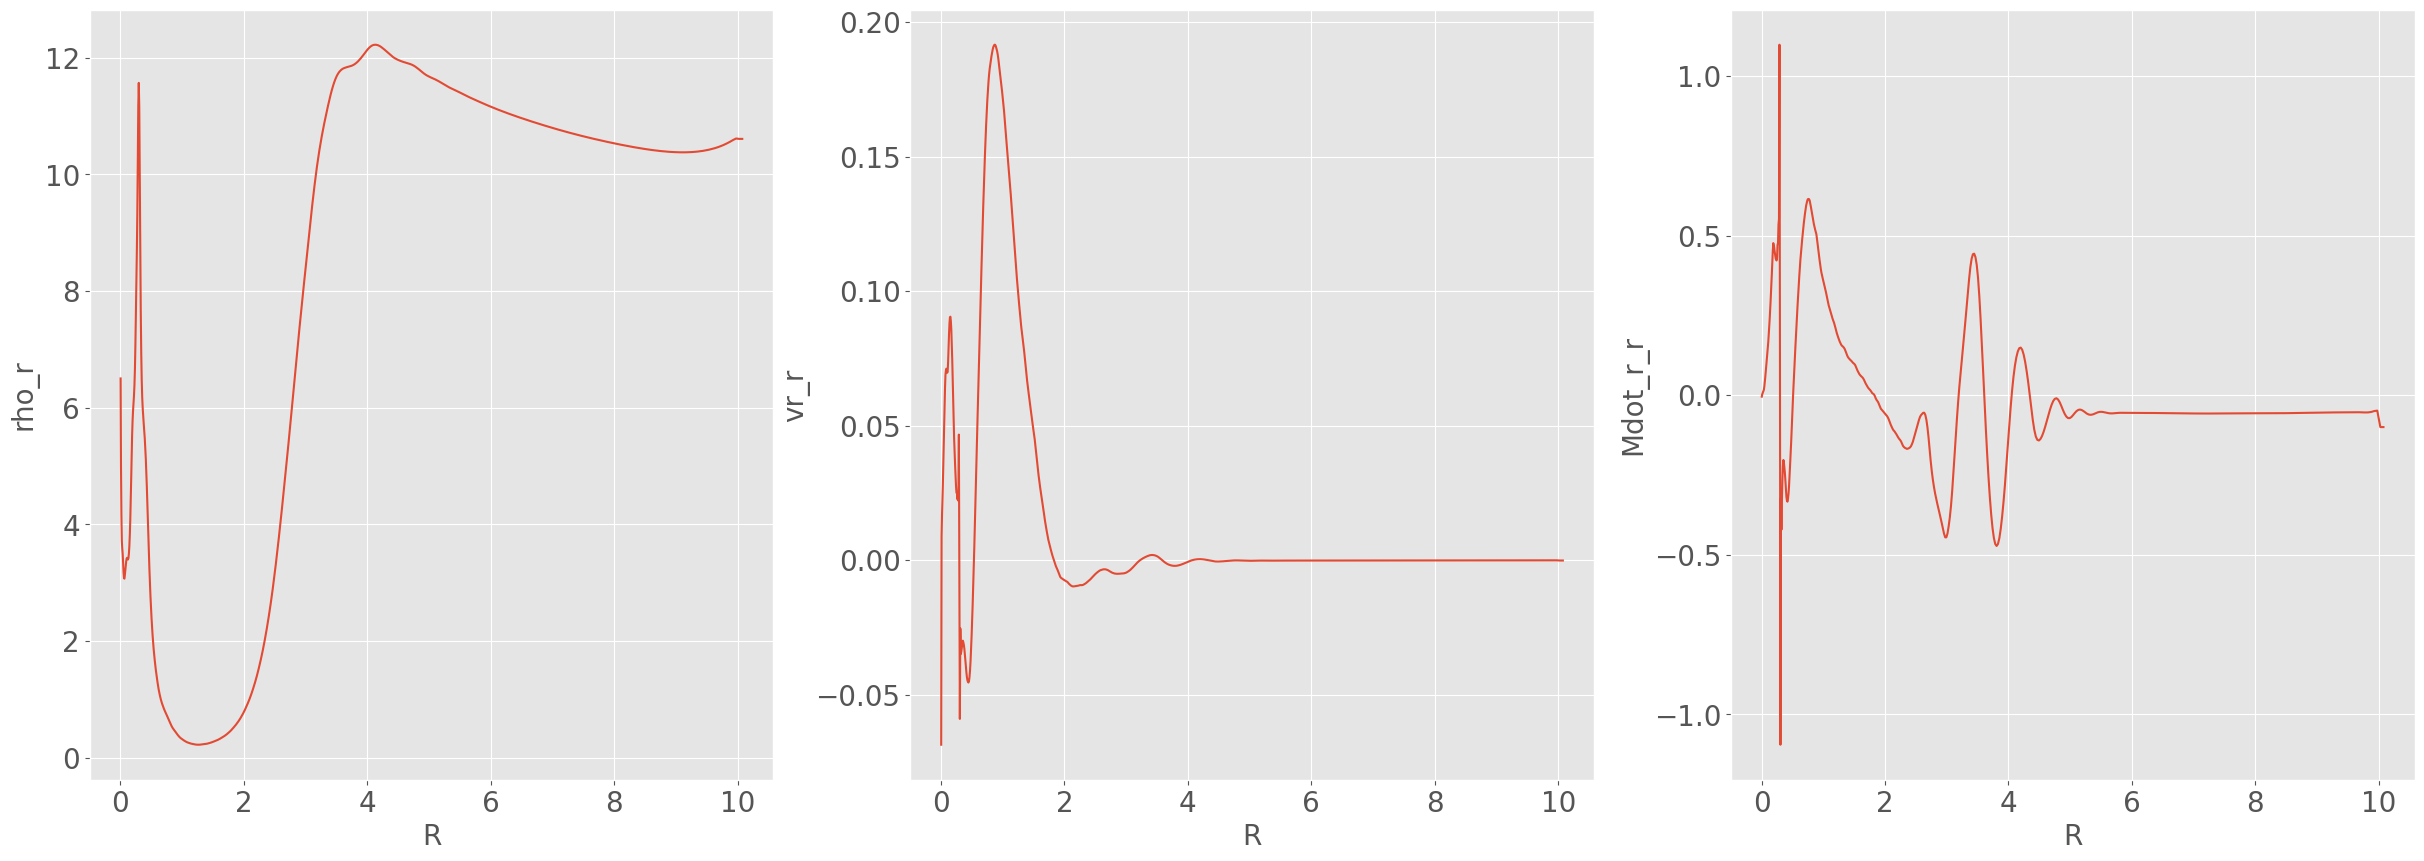

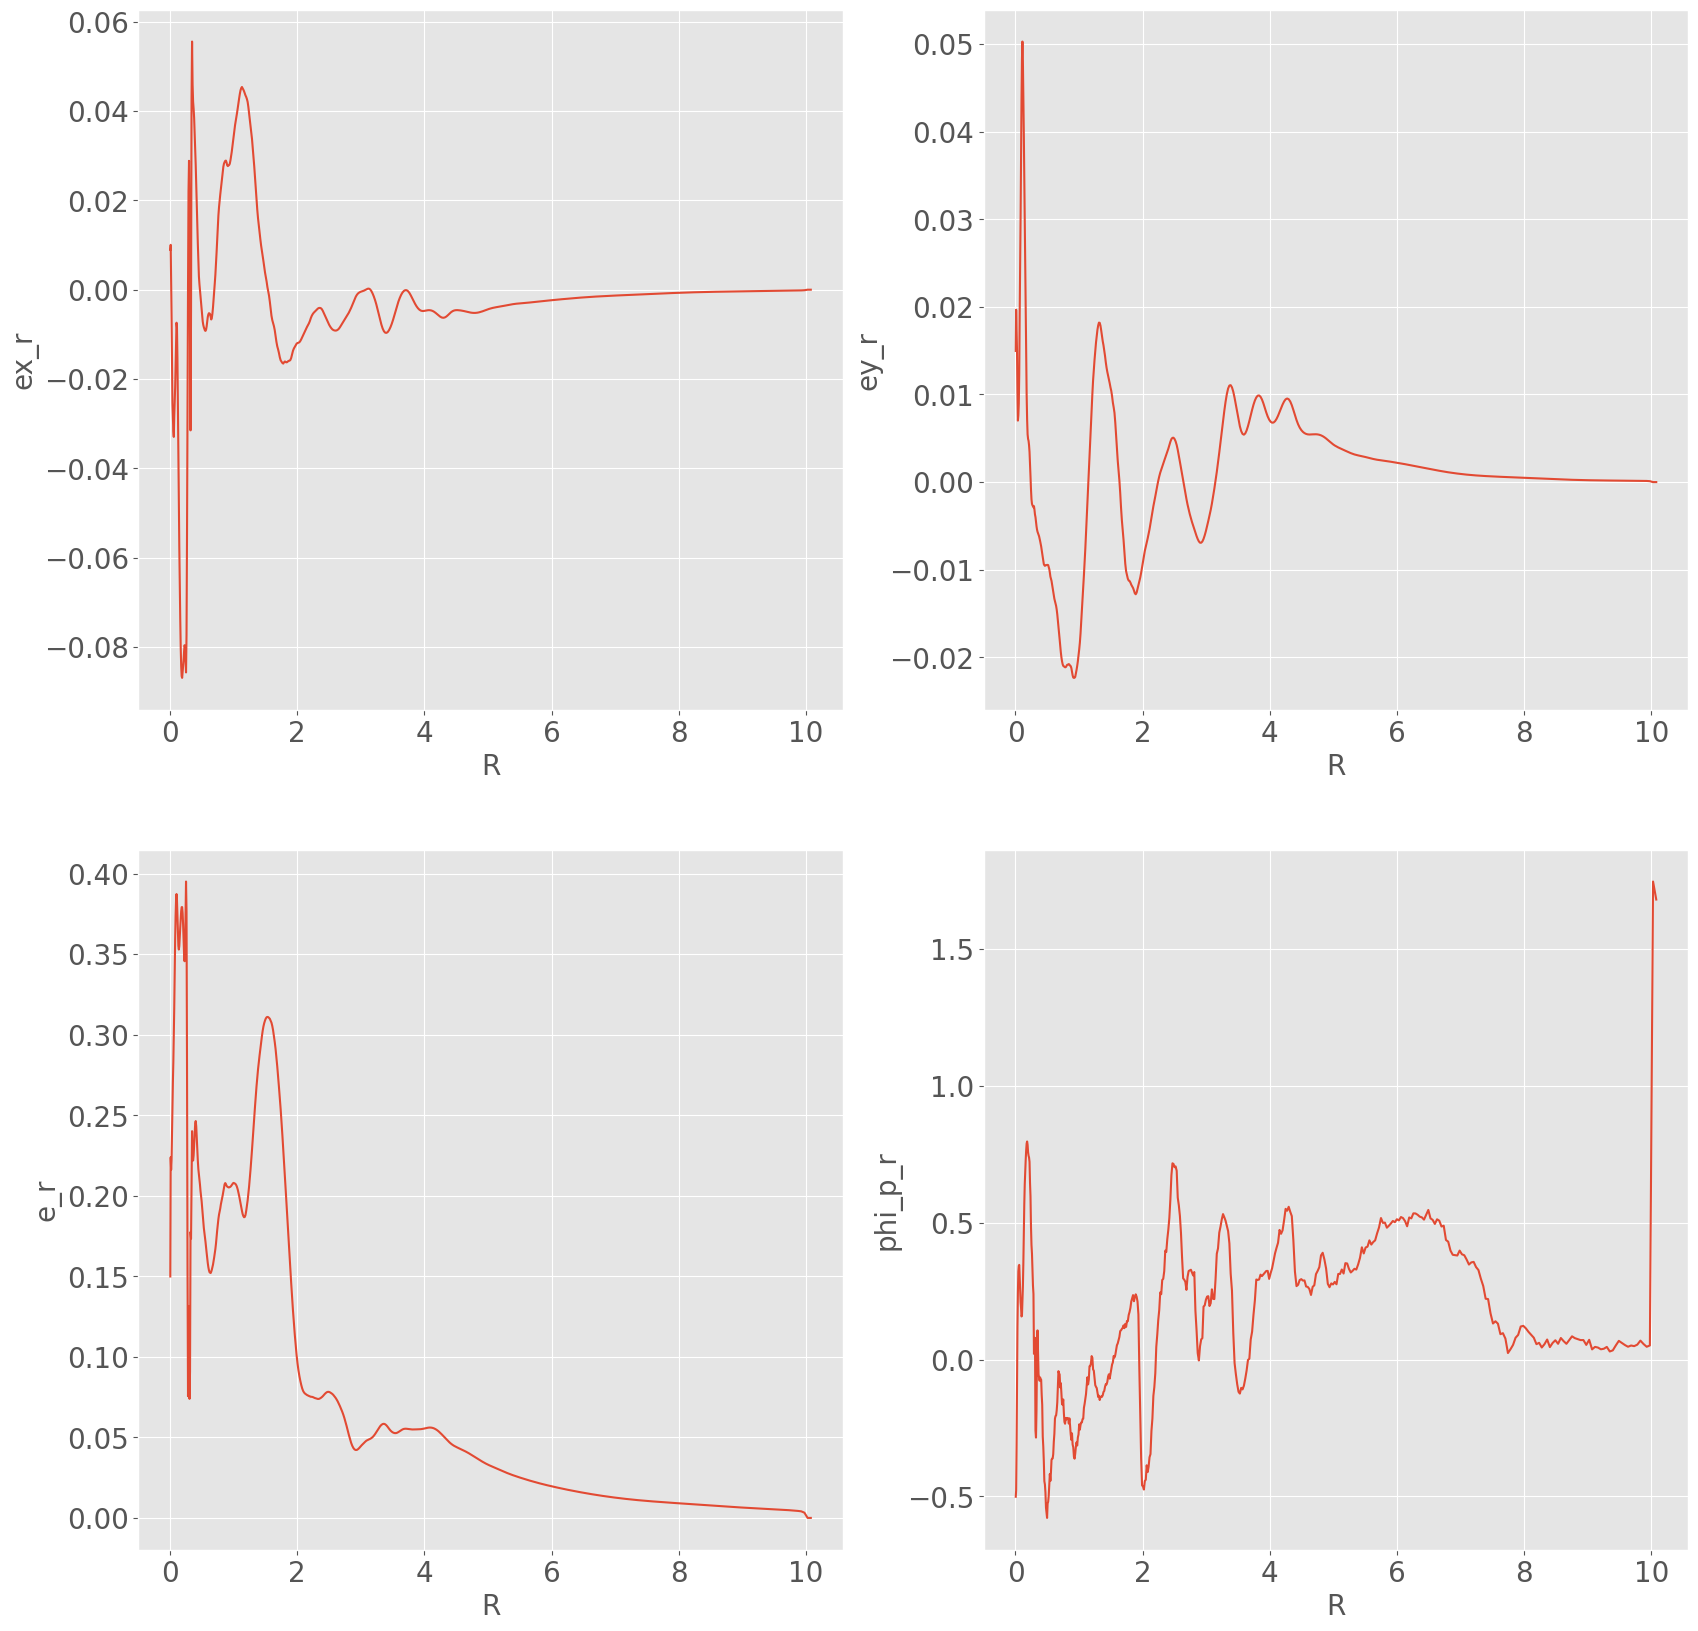

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))

ax[0].plot(R, rho_r)
ax[0].set_ylabel('rho_r', fontsize=20)
# ax[0].set_ylim(-100, 100)
ax[0].tick_params(axis='both', labelsize=20)
ax[1].plot(R, vr_r)
ax[1].set_ylabel('vr_r', fontsize=20)
# ax[1].set_ylim(-1,1)
ax[1].tick_params(axis='both', labelsize=20)
ax[2].plot(R, Mdot_r_r)
ax[2].set_ylabel('Mdot_r_r', fontsize=20)
# ax[2].set_ylim(-50,50)
ax[2].tick_params(axis='both', labelsize=20)

ax[0].set_xlabel('R', fontsize=20)
ax[1].set_xlabel('R', fontsize=20)
ax[2].set_xlabel('R', fontsize=20)   
plt.show()
fig.savefig(plot_dir + '/time_avg_1')
plt.close(fig) #delete figure from memory

fig, ax = plt.subplots(2, 2, figsize=(20,20))

ax[0,0].plot(R, ex_r)
ax[0,0].set_ylabel('ex_r', fontsize=20)
# ax[0,0].set_ylim(-2.5,2.5)
ax[0,0].tick_params(axis='both', labelsize=20)
ax[0,1].plot(R, ey_r)
ax[0,1].set_ylabel('ey_r', fontsize=20)
# ax[0,1].set_ylim(-2.5,2.5)
ax[0,1].tick_params(axis='both', labelsize=20)
ax[1,0].plot(R, e_r)
ax[1,0].set_ylabel('e_r', fontsize=20)
# ax[1,0].set_ylim(0,1)
ax[1,0].tick_params(axis='both', labelsize=20)
ax[1,1].plot(R, phi_p_r)
ax[1,1].set_ylabel('phi_p_r', fontsize=20)
# ax[1,1].set_ylim(-5,5)
ax[1,1].tick_params(axis='both', labelsize=20)

ax[0,0].set_xlabel('R', fontsize=20)
ax[0,1].set_xlabel('R', fontsize=20)
ax[1,0].set_xlabel('R', fontsize=20)
ax[1,1].set_xlabel('R', fontsize=20) 
plt.show()
fig.savefig(plot_dir + '/time_avg_2')
plt.close(fig) #delete figure from memory

In [ ]:
# pcolormesh() is used to plot the 2D data
# Space time plots R vs t
# Use color map: viridis, inferno, etc

# Make spacetime plot of phi_p, use cyclic colormap

# Also plot eccentricity, and phi_p space time plots



In [32]:
R.shape, t_arr.shape,e_tr.shape

((482,), (1000,), (1000, 482))

In [33]:
t_arr = np.arange(0, nt, 1)
import matplotlib.colors as colors

x1 = R
y1 = t_arr

x, y = np.meshgrid(x1, y1)
z = rho_tr

fig, ax = plt.subplots(1,1, figsize=(10,10) )

# Make a colormap object
cmap1 = plt.cm.terrain.copy()

# plot your data with pcolormesh
# im1 = ax.pcolormesh(x1, y1, z,  cmap=cmap1, vmin=-3, vmax=3, rasterized=True)
im1 = ax.pcolormesh(x1, y1, z, norm=colors.LogNorm(vmin=z.min(), vmax=z.max()), cmap=cmap1, rasterized=True)

# Make the colorbar and label it.
cbar1 = fig.colorbar(im1, label='$M/M_{\\rm ej}$', shrink=0.3, pad=0.03, extend='both' )
# cbar1 = fig.colorbar(im1, label='rho')

# To add a grid
# plt.grid(True, color='white',linestyle='-', alpha=0.1, linewidth=2.0)

ax.set_ylabel(r'$t$')
ax.set_xlabel(r'$R$')

plt.tight_layout()
plt.show()

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x15551f6accc0> (for post_execute):


AttributeError: 'Colorbar' object has no attribute '_boundaries'

AttributeError: 'Colorbar' object has no attribute '_boundaries'

<Figure size 1000x1000 with 2 Axes>

In [30]:
x1 = np.linspace(-5, 5, 100)
y1 = np.linspace(0, 3, 200)

x, y = np.meshgrid(x1, y1)
z = np.sin(x) * np.exp(y)

In [28]:
x1.shape, y1.shape, z.shape

((100,), (200,), (200, 100))